<a href="https://colab.research.google.com/github/Tarasishbhattacharya/Amazon_sales/blob/main/Amazon_sales_review.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
working_dir="/content/drive/MyDrive/dat/"
sale_df=pd.read_csv(working_dir+"Amazon Sale Report1.csv")

In [4]:
sale_df.head()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by,New,PendingS
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False,Easy Ship,NaN,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,False,Easy Ship,NaN,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,True,NaN,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,False,Easy Ship,NaN,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,False,NaN,NaN,NaN


In [5]:
sale_df.columns

Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel',
       'ship-service-level', 'Category', 'Size', 'Courier Status', 'Qty',
       'currency', 'Amount', 'ship-city', 'ship-state', 'ship-postal-code',
       'ship-country', 'B2B', 'fulfilled-by', 'New', 'PendingS'],
      dtype='object')

In [6]:
sale_df.shape

(128976, 21)

In [7]:
sale_df.drop("index",axis=1,inplace=True)

In [8]:
sale_df.head(1)

,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by,New,PendingS
0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,0,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False,Easy Ship,NaN,NaN


In [9]:
sale_df["Status"].unique()

array(['Cancelled', 'Shipped - Delivered to Buyer', 'Shipped',
       'Shipped - Returned to Seller', 'Shipped - Rejected by Buyer',
       'Shipped - Lost in Transit', 'Shipped - Out for Delivery',
       'Shipped - Returning to Seller', 'Shipped - Picked Up', 'Pending',
       'Pending - Waiting for Pick Up', 'Shipped - Damaged', 'Shipping'],
      dtype=object)

In [10]:
sale_df["Fulfilment"].unique()

array(['Merchant', 'Amazon'], dtype=object)

In [11]:
sale_df.isnull().sum()

Order ID                   0
Date                       0
Status                     0
Fulfilment                 0
Sales Channel              0
ship-service-level         0
Category                   0
Size                       0
Courier Status             0
Qty                        0
currency                7800
Amount                  7800
ship-city                 35
ship-state                35
ship-postal-code          35
ship-country              35
B2B                        0
fulfilled-by           89713
New                   128976
PendingS              128976
dtype: int64

In [12]:
sale_df.drop(["New","PendingS"],axis=1,inplace=True)

In [13]:
sale_df["currency"].unique()

array(['INR', nan], dtype=object)

In [15]:
cols=["ship-city","ship-state","ship-postal-code","ship-country"]

for col in cols:
  sale_df[col].fillna("Not available",inplace=True)

In [16]:
sale_df["Amount"].unique()

array([ 647.62,  406.  ,  329.  , ...,  708.58, 1244.  ,  639.  ])

In [18]:
sale_df["Amount"].fillna(sale_df["Amount"].mean,inplace=True)

In [19]:
sale_df["fulfilled-by"].unique()

array(['Easy Ship', nan], dtype=object)

In [20]:
sale_df.isnull().sum()

Order ID                  0
Date                      0
Status                    0
Fulfilment                0
Sales Channel             0
ship-service-level        0
Category                  0
Size                      0
Courier Status            0
Qty                       0
currency               7800
Amount                    0
ship-city                 0
ship-state                0
ship-postal-code          0
ship-country              0
B2B                       0
fulfilled-by          89713
dtype: int64

In [21]:
sale_df.dropna(inplace=True)

In [22]:
sale_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37527 entries, 0 to 128892
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Order ID            37527 non-null  object
 1   Date                37527 non-null  object
 2   Status              37527 non-null  object
 3   Fulfilment          37527 non-null  object
 4   Sales Channel       37527 non-null  object
 5   ship-service-level  37527 non-null  object
 6   Category            37527 non-null  object
 7   Size                37527 non-null  object
 8   Courier Status      37527 non-null  object
 9   Qty                 37527 non-null  int64 
 10  currency            37527 non-null  object
 11  Amount              37527 non-null  object
 12  ship-city           37527 non-null  object
 13  ship-state          37527 non-null  object
 14  ship-postal-code    37527 non-null  object
 15  ship-country        37527 non-null  object
 16  B2B                 3

In [23]:
sale_df["Category"].unique()

array(['T-shirt', 'Shirt', 'Blazzer', 'Socks', 'Trousers', 'Wallet',
       'Perfume', 'Shoes'], dtype=object)

<Axes: xlabel='Category', ylabel='count'>

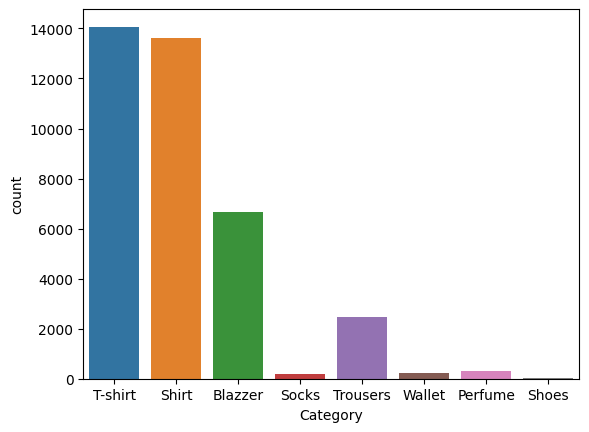

In [24]:
sns.countplot(x="Category",data=sale_df)

In [25]:
sale_df["Sales Channel"].unique()

array(['Amazon.in'], dtype=object)

In [26]:
sale_df["Qty"].unique()

array([0, 1, 3, 2, 5, 4])

In [29]:
data=sale_df.groupby("Category")["Qty"].max().reset_index().sort_values(by="Qty",ascending=False)

<Axes: xlabel='Category', ylabel='Qty'>

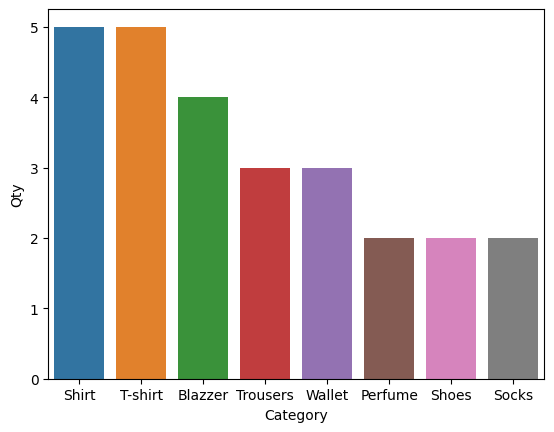

In [31]:
sns.barplot(x="Category",y="Qty",data=data)

In [32]:
sale_df["ship-country"].unique()

array(['IN', 'Not available'], dtype=object)

In [33]:
sale_df["ship-city"].unique()

array(['MUMBAI', 'BENGALURU', 'PUDUCHERRY', ..., 'tirupati', 'badlapur',
       'VARANASIVaranasi'], dtype=object)

In [40]:
max_amount_data=sale_df.groupby("Category")["Amount"].max().reset_index().sort_values(by="Amount",ascending=False).head(5)
max_amount_data

,Category,Amount
5,T-shirt,5495.0
0,Blazzer,2860.0
2,Shirt,2796.0
6,Trousers,1797.0
3,Shoes,1770.0


<Axes: xlabel='Category', ylabel='Amount'>

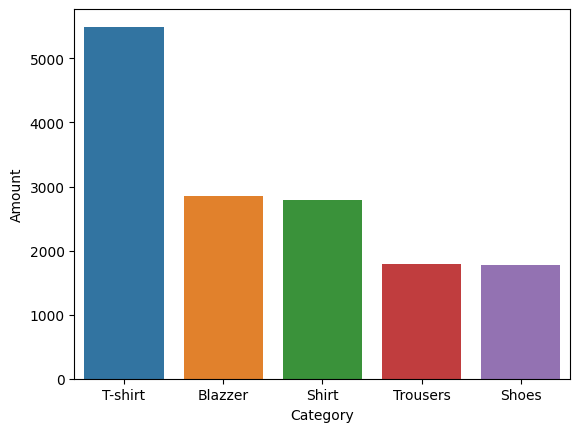

In [39]:
sns.barplot(x="Category",y="Amount",data=max_amount_data)

In [42]:
sale_df["Date"].unique()

array(['04-30-22', '04-29-22', '04-28-22', '04-27-22', '04-26-22',
       '04-25-22', '04-24-22', '04-23-22', '04-22-22', '04-21-22',
       '04-20-22', '04-19-22', '04-18-22', '04-17-22', '04-16-22',
       '04-15-22', '04-14-22', '04-13-22', '04-12-2022', '04-11-2022',
       '04-10-2022', '04-09-2022', '04-08-2022', '04-07-2022',
       '04-06-2022', '04-05-2022', '04-04-2022', '04-03-2022',
       '04-02-2022', '04-01-2022', '03-31-22', '05-31-22', '05-30-22',
       '05-29-22', '05-28-22', '05-27-22', '05-26-22', '05-25-22',
       '05-24-22', '05-23-22', '05-22-22', '05-21-22', '05-20-22',
       '05-19-22', '05-18-22', '05-17-22', '05-16-22', '05-15-22',
       '05-14-22', '05-13-22', '05-12-2022', '05-11-2022', '05-10-2022',
       '05-09-2022', '05-08-2022', '05-07-2022', '05-06-2022',
       '05-05-2022', '05-04-2022', '05-03-2022', '05-02-2022',
       '05-01-2022', '06-29-22', '06-28-22', '06-27-22', '06-26-22',
       '06-25-22', '06-24-22', '06-23-22', '06-22-22', '06-21-

In [43]:
sale_df["Month"]=sale_df["Date"].apply(lambda x:x.split("-")[0])

In [44]:
sale_df.head(1)

,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by,Month
0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,0,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False,Easy Ship,04


In [50]:
month_wise_amount=sale_df.groupby("Month")["Amount"].max().reset_index().sort_values(by="Amount",ascending=False)

<Axes: xlabel='Month', ylabel='Amount'>

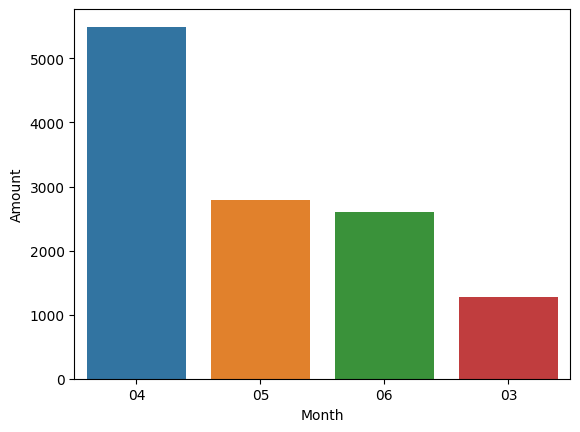

In [51]:
sns.barplot(x="Month",y="Amount",data=month_wise_amount)